In [37]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import queue
import random

In [38]:
class AbelianSandpile:
    '''
    An Abelian sandpile model simulation. The sandpile is initialized with a random number of grains at each lattice site
    . Then, a single grain is dropped at a random location. The sandpile is then allowed to evolve until it is stable. This process
    is repeated n_step times.

    A single step of the simulation consists of two stages: a random sand grain is dropped onto the lattice at a random location.
    Then , a set of avalanches occurs causing sandgrains to get redistributed to their neighboring locations.

    Parameters:
    n (int): The size of the grid
    grid (np.ndarray): The grid of the sandpile
    history (list): A list of sandpile grids at each timestep
    all_durations (list): A list of the durations of each avalanche 
    '''

    def __init__(self, n=100, random_state=None) -> None:
        self.n = n
        np.random.seed(random_state) # set the random state
        self.grid = np.random.choice([0, 1, 2, 3], size=[n, n])
        self.history = [self.grid.copy()]
        self.all_durations = list() # keep track of the duration of toppling events

    def step(self):
        '''
        Perform a single step of the sandpile model. Step corresponds a single sandgrain
        addition and consequent toppling it causes.

        Returns: None
        '''

        # is_too_high is a 2D boolean matrix that note whether the grid [i, j] is too high
        is_too_high = np.full(self.grid.shape, False, dtype=bool)
        # site_too_high is a queue that stores the coordinates of the grid sites that are too high
        site_too_high =  queue.Queue(maxsize = self.n * self.n)

        # add one sandgrain
        x = random.randint(0, self.n - 1)
        y = random.randint(0, self.n - 1)
        self.grid[x, y] += 1
        if self.grid[x, y] < 4: # if the height is not > 3, this step is finished
            self.all_durations.append(0) # and let's take the convention that the duration is 0 in this case 
            return
        
        # otherwise, a set of avalanches will start
        # Record the duration of this step
        duration = 0
        is_too_high[x, y] = True
        site_too_high.put((x, y))

        # the avalanche should continue unitl there is no element left in the site_too_high queue
        while (not site_too_high.empty()):
            size = site_too_high.qsize() # for each iteration, the number of topplings is equal to the number of too high sites by far
            for i in range(size):
                current = site_too_high.get()
                x = current[0]
                y = current[1]
                self.grid[x, y] -= 4 # reduce the height of current site
                is_too_high[x, y] = False
                for move in [(0, 1), (0, -1), (1, 0), (-1, 0)]:
                    i = move[0]
                    j = move[1] 
                    if self.is_in_grid(x + i, y + j): # only take care of the sites that are in the grid
                        self.grid[x + i, y + j] += 1
                        if self.grid[x + i, y + j] > 3 and (not is_too_high[x + i, y + j]):
                                   site_too_high.put((x + i, y + j))
                                   is_too_high[x + i, y + j] = True
            duration += 1 # assume that if more than one sites become > 3 at the same time, they shoul topple simultaneously
        # add duration of current step to the duration list
        # add current grid to the history list
        self.all_durations.append(duration)
        self.history.append(self.grid.copy())
    
    def is_in_grid(self, x, y):
        '''
        a helper function to check whether a site is within the grid

        paremeter:
        x (int): the row index
        y (int): the col index
        
        return: bool - True if the site (x, y) is within the grid
        '''
        return x >= 0 and x < self.n and y >= 0 and y < self.n

    @staticmethod
    def check_difference(grid1, grid2):
        '''
        Check the total number of different sites between two grids
        '''
        return np.sum(grid1 != grid2)

    def simulate(self, n_step):
        '''
        simulate the process for n steps

        parameters:
        n_step (int): the total number steps to simulate

        return: None
        '''
        for i in range(n_step):
            self.step()

initial state
final state


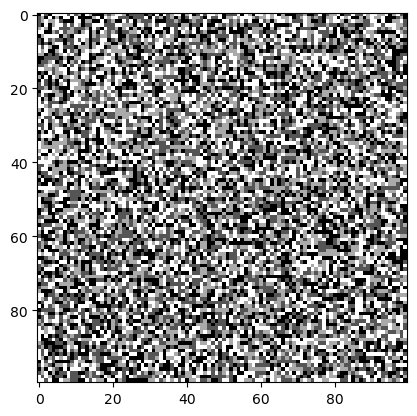

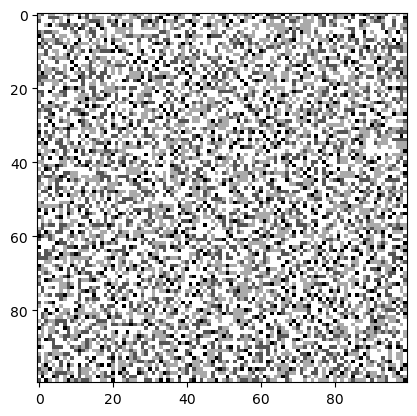

In [39]:
# test the Abelian sandpile
# show the initial state
model = AbelianSandpile(n=100, random_state=0)
print("initial state")
plt.figure()
plt.imshow(model.grid, cmap = 'gray')

# run 10000 rounds and show the final state
model.simulate(10000)
print("final state")
plt.figure()
plt.imshow(model.grid, cmap = 'gray')

Text(0, 0.5, 'Count')

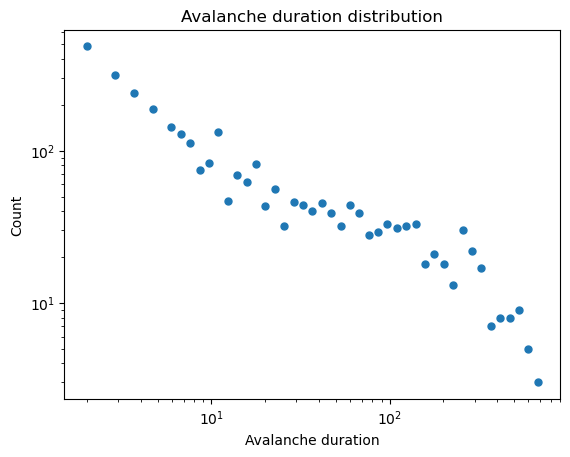

In [41]:
# check the distribution of avalanch time
# code copied form William's doc
all_avalanche_durations = model.all_durations
log_bins = np.logspace(np.log10(2), np.log10(np.max(all_avalanche_durations)), 50) # logarithmic bins for histogram
vals, bins = np.histogram(all_avalanche_durations, bins=log_bins)
plt.figure()
plt.loglog(bins[:-1], vals, '.', markersize=10)
plt.title('Avalanche duration distribution')
plt.xlabel('Avalanche duration')
plt.ylabel('Count')

Since the log-log plot shows a linear trend, the distribution of avalanche time has a $1/T^\alpha$ dependency

Complexity analysis: <br />
The time complexity is dominated by the BFS algorithm in the step method, which is $O(N^2)$ <br />
The space complexity is dominated by the usage of the grid matrix and help matrix is_too_high, which is $O(N^2)$